# 50 Startupの決定木モデルの構築

## データのインストール

GCPのストレージバケット上にデータを保存しているので、これをdataディレクトリ以下に保存します。
その際にgsutilコマンドを利用するので、インストールします。

In [1]:
!pip install gsutil

     |████████████████████████████████| 2.9MB 6.1MB/s 
     |████████████████████████████████| 174kB 20.3MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 1.4MB 27.3MB/s 
     |████████████████████████████████| 112kB 33.2MB/s 
     |████████████████████████████████| 3.2MB 33.0MB/s 
  Created wheel for gsutil: filename=gsutil-4.60-cp37-none-any.whl size=3711516 sha256=d9193c1ac7c555ff33a18a495289b600056fab50a1fde8248d0a5a51349b4348
  Stored in directory: /root/.cache/pip/wheels/1a/8c/67/3fec8c5f9ad4db22c646f3389d9edef77c1b99c7bef9e41502
  Created wheel for gcs-oauth2-boto-plugin: filename=gcs_oauth2_boto_plugin-2.7-cp37-none-any.whl size=23204 sha256=bf80b80685078029754c81679125106294a9df5295345400a4bf9346b596c15c
  Stored in directory: /root/.cache/pip/wheels/2e/6b/7c/bd86832ceb17e0ae3d362c44f461832452eeaacddfcf9128ee
  Created w

In [2]:
!gsutil cp gs://gcp_mybacket1/50_Startups.csv data/

Copying gs://gcp_mybacket1/50_Startups.csv...
/ [1 files][  2.4 KiB/  2.4 KiB]                                                
Operation completed over 1 objects/2.4 KiB.                                      


## データの確認

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)のインストール

In [5]:
from sklearn.tree import DecisionTreeRegressor

## 州名のOne-hot Encode化

In [6]:
df = pd.get_dummies(df, columns=['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## fitメソッドについて

下記ドキュメントの抜粋です。

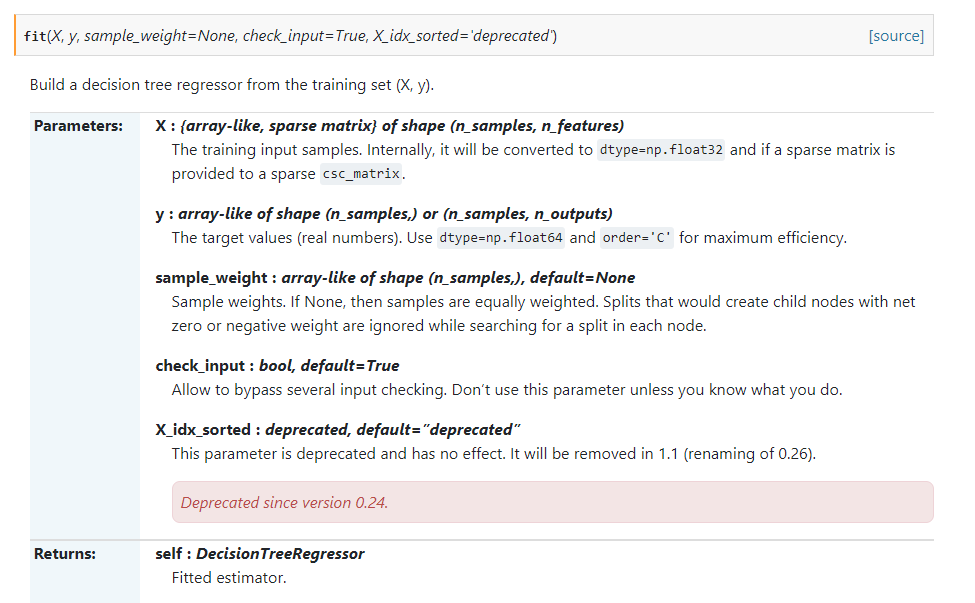

In [14]:
df_X = df.drop('Profit', axis=1)
df_X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [13]:
df_y = df['Profit']
df_y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [33]:
import numpy as np

In [85]:
X=df_X.to_numpy()
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [16]:
y=df_y.to_numpy()
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## モデルの作成

木の深さを2とします。

In [122]:
reg=DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)
y_pred=reg.predict(X)
y_pred

array([184838.842     , 184838.842     , 184838.842     , 184838.842     ,
       184838.842     , 138146.996875  , 138146.996875  , 138146.996875  ,
       138146.996875  , 138146.996875  , 138146.996875  , 138146.996875  ,
       138146.996875  , 138146.996875  , 138146.996875  , 138146.996875  ,
       138146.996875  , 138146.996875  , 138146.996875  , 138146.996875  ,
        98553.3785    , 138146.996875  ,  98553.3785    ,  98553.3785    ,
        98553.3785    ,  98553.3785    ,  98553.3785    ,  98553.3785    ,
        98553.3785    ,  98553.3785    ,  98553.3785    ,  98553.3785    ,
        98553.3785    ,  98553.3785    ,  98553.3785    ,  98553.3785    ,
        98553.3785    ,  98553.3785    ,  55002.02555556,  98553.3785    ,
        98553.3785    ,  98553.3785    ,  55002.02555556,  55002.02555556,
        55002.02555556,  55002.02555556,  55002.02555556,  55002.02555556,
        55002.02555556,  55002.02555556])

## スコアの計算

In [123]:
reg.score(X,y)

0.8833796450312408

定義に従って計算しても結果は同じです。

In [124]:
1- ((y - y_pred) ** 2).sum()/((y - y.mean()) ** 2).sum()

0.8833796450312408

## 木を可視化

In [116]:
from sklearn.tree import export_graphviz
import graphviz

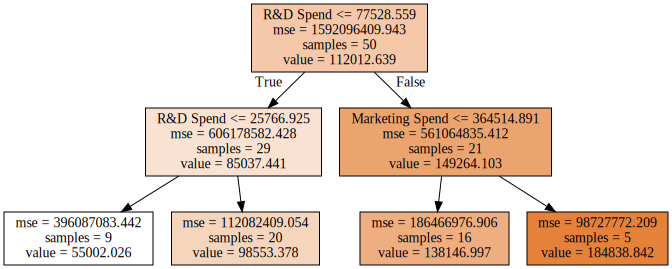

In [125]:
export_graphviz(
    reg,
    out_file='tree.dot',
    feature_names=df_X.columns.values.tolist(),
    filled=True
)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## モデルの可視化

[EDA](https://colab.research.google.com/drive/1rVnYWdVL02L4usHn-1l_ok9yI-GBWTWm?usp=sharing#scrollTo=pN2a8ZQk4LAW)で示した通り、R&D SpendとProfitの間に強い相関があるので、両者を軸にとったグラフをプロットします。

In [118]:
import matplotlib.pyplot as plt

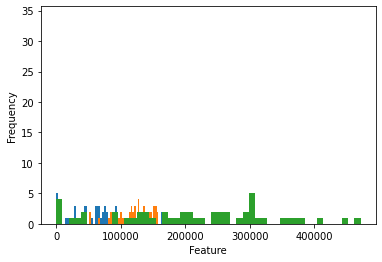

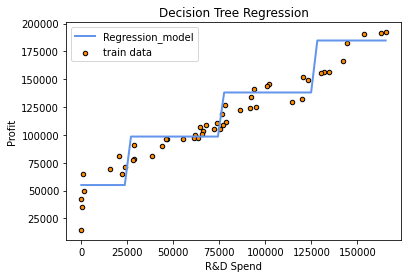

In [129]:
#To generate a best fit model
X_range=np.zeros((50,6))
y_range=np.zeros((50,))
for i in range(6):
    Xi=X[:,i]
    vals=plt.hist(Xi,49)#分割数50とした各特徴量のヒストグラムの作成 vals[0]が頻度、vals[1]が階級
    plt.xlabel("Feature")
    plt.ylabel("Frequency")
    X_range[:,i]=np.transpose(vals[1])

y_range=reg.predict(X_range)#テストとして各階級（均等な数値列）に対して、予測を実施


# Plot the results
plt.figure()
plt.scatter(X[:,0], y, s=20, edgecolor="black", c="darkorange", label="train data")
# plt.scatter(x_test[:,0], reg.predict(x_test), s=30, color="yellowgreen", label="test data", linewidth=2)
plt.plot(X_range[:,0], y_range, color="cornflowerblue",
         label="Regression_model", linewidth=2)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()